In [38]:
import pandas as pd
import numpy as np

In [2]:
file_path = '/content/E-commerce_data.xlsx'

pd.read_excel(file_path, sheet_name=None)

{'customers':      customer_id  join_date  city_id  gender_id
 0              1 2022-01-08        7          1
 1              2 2023-05-02       20          2
 2              3 2023-05-14       15          1
 3              4 2022-11-25       11          2
 4              5 2023-04-26        8          1
 ..           ...        ...      ...        ...
 995          996 2022-10-28        3          1
 996          997 2022-07-07       20          2
 997          998 2024-03-09       11          2
 998          999 2022-07-16        6          1
 999         1000 2024-04-08        2          2
 
 [1000 rows x 4 columns],
 'genders':    gender_id gender_name
 0          1        Male
 1          2      Female,
 'cities':     city_id            city_name
 0         1                Cairo
 1         2           Alexandria
 2         3                 Giza
 3         4     Shubra El-Kheima
 4         5            Port Said
 5         6                 Suez
 6         7             Mansoura

In [3]:
customers = pd.read_excel(file_path, sheet_name= 'customers')
gender = pd.read_excel(file_path, sheet_name= 'genders')
cities = pd.read_excel(file_path, sheet_name= 'cities')
transactions = pd.read_excel(file_path, sheet_name= 'transactions')
branches = pd.read_excel(file_path, sheet_name= 'branches')
merchants = pd.read_excel(file_path, sheet_name= 'merchants')

In [4]:
data = pd.merge(transactions, customers, on = 'customer_id')
data = pd.merge(data,cities, on = 'city_id')
data = pd.merge(data, branches, on = 'branch_id')
data = pd.merge(data, merchants, on = 'merchant_id')
data = pd.merge(data, gender, on = 'gender_id')

In [5]:
data

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,merchant_id,merchant_name,gender_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan,7,Berry-Anderson,Female
1,864,733,2023-12-19,burned,ufP-357,2023-12-24,7,2023-05-16,15,2,Aswan,7,Berry-Anderson,Female
2,4127,695,2024-04-11,burned,Tul-911,2024-04-14,7,2023-11-27,15,2,Aswan,7,Berry-Anderson,Female
3,2563,723,2024-03-17,subscribed,iIl-946,NaT,7,2021-09-12,15,2,Aswan,7,Berry-Anderson,Female
4,1976,332,2023-02-25,burned,wDk-874,2023-03-09,7,2022-06-24,15,2,Aswan,7,Berry-Anderson,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4018,893,2023-11-12,subscribed,NPq-091,NaT,8,2022-01-22,17,1,Damanhur,20,Griffin-Leblanc,Male
4996,2317,726,2024-07-09,subscribed,ZUC-994,NaT,8,2024-07-08,17,1,Damanhur,20,Griffin-Leblanc,Male
4997,4651,726,2024-07-13,subscribed,ePT-683,NaT,8,2024-07-08,17,1,Damanhur,20,Griffin-Leblanc,Male
4998,2910,548,2024-04-23,subscribed,ACW-075,NaT,8,2023-10-27,17,1,Damanhur,20,Griffin-Leblanc,Male


# ***Cleaning Data***

In [6]:
data.isnull().sum()

,0
transaction_id,0
customer_id,0
transaction_date,0
transaction_status,0
coupon_name,0
burn_date,2484
branch_id,0
join_date,0
city_id,0
gender_id,0


In [7]:
data.duplicated().sum()

0

In [8]:
data.drop({'city_id', 'merchant_id', 'customer_id', 'transaction_id', 'merchant_name'}, inplace = True, axis=1)

In [9]:
data['transaction_status'].value_counts()

,count
transaction_status,
burned,2516
subscribed,2484


In [10]:
data['coupon_name'].value_counts()

,count
coupon_name,
uNY-568,1
MyD-825,1
xAJ-928,1
jZT-616,1
ddv-452,1
...,...
EgY-071,1
wdQ-385,1
LKR-325,1


In [11]:
data['burn_date'].value_counts()

,count
burn_date,
2024-07-30,13
2024-07-24,13
2024-07-23,13
2024-08-03,12
2024-05-01,12
...,...
2023-08-06,1
2023-09-05,1
2023-03-08,1


In [12]:
data['city_name'].value_counts()

,count
city_name,
Cairo,337
Port Said,321
Aswan,298
Giza,291
Fayyum,272
Qena,263
Damanhur,263
El-Mahalla El-Kubra,263
Shubra El-Kheima,259


In [13]:
data['gender_name'].value_counts()

,count
gender_name,
Male,2567
Female,2433


# ***Data Preprocessing***

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
data['transaction_status'] = le.fit_transform(data['transaction_status'])

In [16]:
data['city_name'] = le.fit_transform(data['city_name'])

In [17]:
data['gender_name'] = le.fit_transform(data['gender_name'])

In [18]:
data['burn_date'].fillna(data['burn_date'].mean, inplace = True)

<ipython-input-18-b4bf8cc74f48>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0             NaT
1      2023-12-24
2      2024-04-14
3             NaT
4      2023-03-09
          ...    
4995          NaT
4996          NaT
4997          NaT
4998          NaT
4999   2024-07-22
Name: burn_date, Length: 5000, dtype: datetime64[ns]>' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data['burn_date'].fillna(data['burn_date'].mean, inplace = True)


In [19]:
# Convert date columns to numeric representation
from datetime import datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
for col in data.select_dtypes(include=['datetime']):
    data[col] = pd.to_numeric(data[col])

In [20]:
data['join_date'] = pd.to_datetime(data['join_date'])

# ***EDA***

In [21]:
data.shape

(5000, 9)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_date    5000 non-null   int64         
 1   transaction_status  5000 non-null   int64         
 2   coupon_name         5000 non-null   object        
 3   burn_date           5000 non-null   object        
 4   branch_id           5000 non-null   int64         
 5   join_date           5000 non-null   datetime64[ns]
 6   gender_id           5000 non-null   int64         
 7   city_name           5000 non-null   int64         
 8   gender_name         5000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 351.7+ KB


In [23]:
data.describe()

,transaction_date,transaction_status,branch_id,join_date,gender_id,city_name,gender_name
count,5.000000e+03,5000.00000,5000.000000,5000,5000.00000,5000.000000,5000.00000
mean,1.697950e+18,0.49680,5.529800,2023-01-18 14:41:34.080000,1.48660,9.328800,0.51340
min,1.628122e+18,0.00000,1.000000,2021-07-18 00:00:00,1.00000,0.000000,0.00000
25%,1.685556e+18,0.00000,3.000000,2022-04-10 00:00:00,1.00000,4.000000,0.00000
50%,1.704154e+18,0.00000,6.000000,2023-01-11 00:00:00,1.00000,9.000000,1.00000
75%,1.715126e+18,1.00000,8.000000,2023-10-25 00:00:00,2.00000,14.000000,1.00000
max,1.720915e+18,1.00000,10.000000,2024-07-13 00:00:00,2.00000,19.000000,1.00000
std,2.074780e+16,0.50004,2.895788,NaN,0.49987,5.676754,0.49987


In [24]:
data.dtypes

,0
transaction_date,int64
transaction_status,int64
coupon_name,object
burn_date,object
branch_id,int64
join_date,datetime64[ns]
gender_id,int64
city_name,int64
gender_name,int64


# ***Feature Selection***

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
s = SelectKBest(f_classif, k=5)

In [26]:
for col in data.select_dtypes(include=['datetime']):
    data[col] = pd.to_numeric(data[col])
numerical_data = data.select_dtypes(include=['number'])

In [27]:
from sklearn.decomposition import PCA

# Select only numerical features for PCA
pca = PCA(n_components=4)
pca_fit = pca.fit_transform(numerical_data)

# ***Model Selection***

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 40)
kmeans.fit(pca_fit)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=40)

In [29]:
y_pred = kmeans.predict(pca_fit)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [30]:
#look at the centroids that algorithm found:
kmeans.cluster_centers_

array([[ 1.02761087e+16,  9.42619917e+15, -4.60231549e-01,
        -1.90318177e-02],
       [-3.17353555e+16, -3.19123806e+15,  3.03646199e-01,
         9.50465057e-03],
       [ 4.37664469e+16, -1.02805294e+16,  2.14325307e-01,
         1.48006012e-02]])

In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 5)

In [32]:
#Fit the model
dbscan.fit(pca_fit)

DBSCAN(eps=3)

In [33]:
y_pred = dbscan.fit_predict(pca_fit)
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [34]:
#The labels instance variable:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

# ***Data Visualization***

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

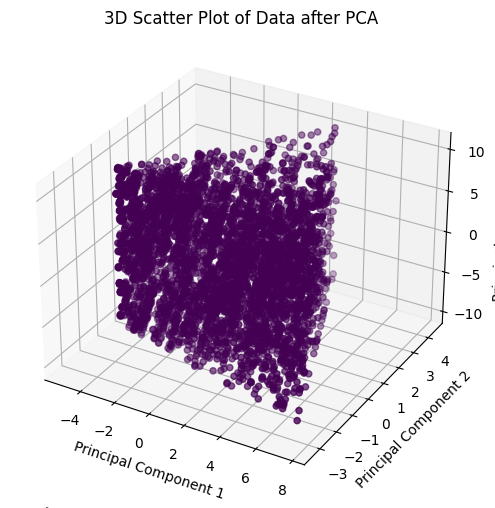

In [45]:
# prompt:  create 3d plot of data after pca

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_fit[:, 0], pca_fit[:, 1], pca_fit[:, 2], c=y_pred, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('3D Scatter Plot of Data after PCA')
plt.show()


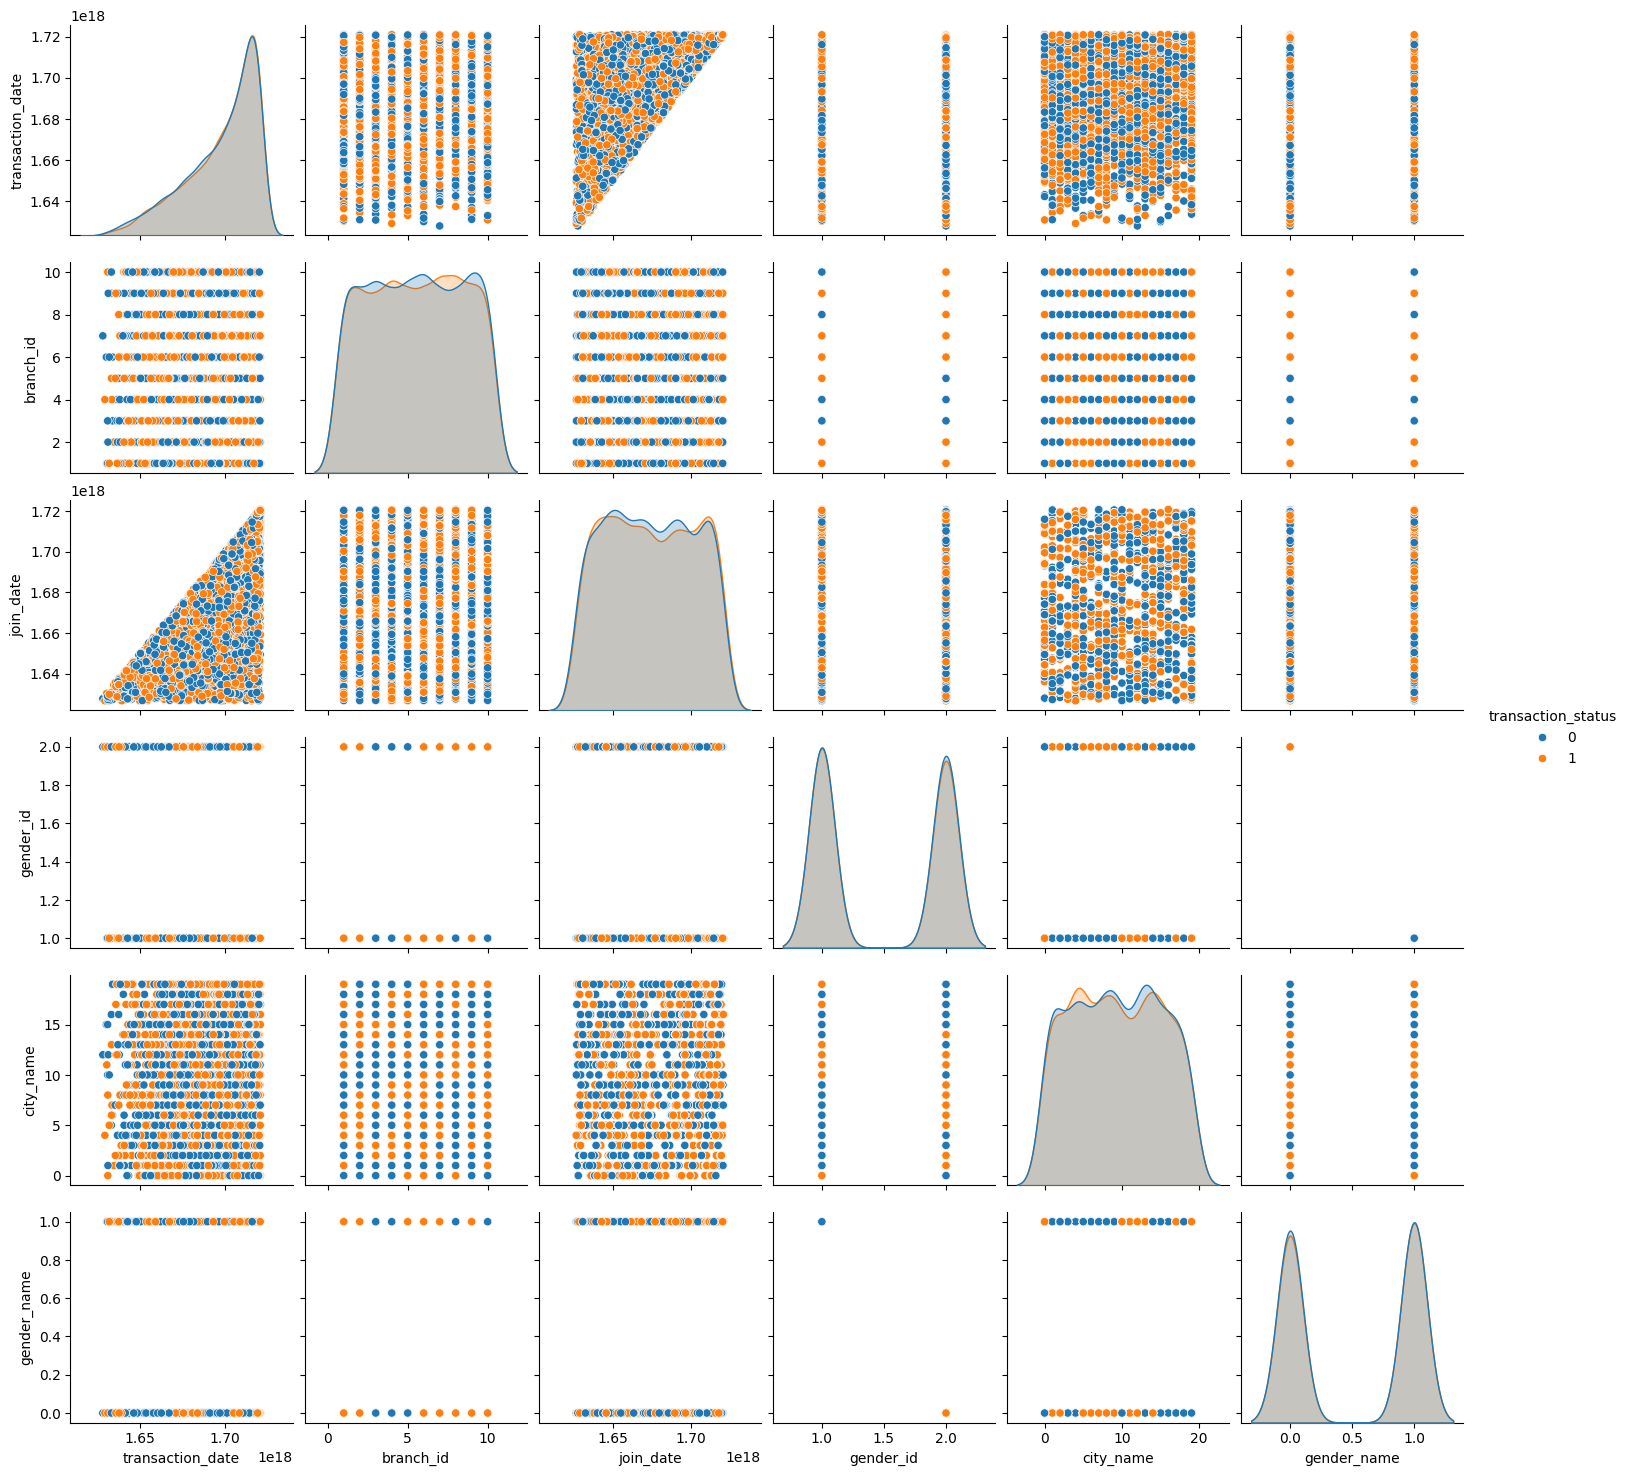

In [49]:
sns.pairplot(data, hue = 'transaction_status')

<Axes: xlabel='transaction_status', ylabel='city_name'>

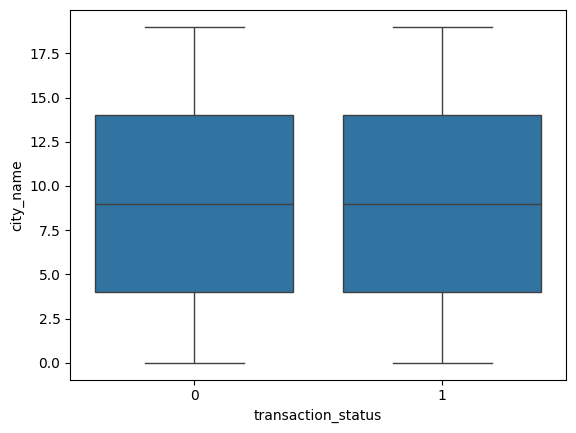

In [50]:
sns.boxplot(x = 'transaction_status', y = 'city_name', data = data)

# ***Model Evaluation***

In [35]:
inertia = kmeans.inertia_
inertia

1.419746283514538e+36

In [41]:
from sklearn.metrics import silhouette_score

# Check the number of unique labels
n_clusters = len(np.unique(y_pred))

# Calculate silhouette score if the number of clusters is greater than 1
if n_clusters > 1:
    silhouette_avg = silhouette_score(pca_fit, y_pred)
    print("The average silhouette_score is :" ,silhouette_avg)
else:
    print("Silhouette score cannot be calculated for a single cluster.")

Silhouette score cannot be calculated for a single cluster.


# ***Analyzing and describing each segment based on customer behavior***

In [43]:
inertia = []
max_clusters = 10
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, random_state=40)
  kmeans.fit(pca_fit)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex